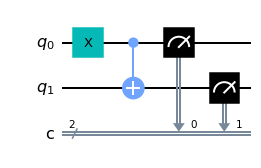

In [1]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2, 2) # 2 qubits, 2 classical bits

# Basic Circuit
circuit.x(0) #not gate
circuit.cx(0, 1) #controlled not (Flips 2nd qubit iff first qubit is 1)

circuit.measure([0, 1], [0, 1]) #Map qubit values to classical bits
circuit.draw(output='mpl')

In [3]:
from qiskit import IBMQ

IBMQ.save_account(open('token.txt', 'r').read())

In [4]:
IBMQ.load_account()


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [8]:
provider = IBMQ.get_provider(hub='ibm-q')

for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = 'simulated'
        
    print(f'{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits')

ibmq_qasm_simulator has 2 queued and simulated qubits
ibmqx2 has 2101 queued and 5 qubits
ibmq_16_melbourne has 5251 queued and 15 qubits
ibmq_armonk has 0 queued and 1 qubits
ibmq_athens has 4540 queued and 5 qubits
ibmq_santiago has 6166 queued and 5 qubits
ibmq_lima has 45 queued and 5 qubits
ibmq_belem has 5 queued and 5 qubits
ibmq_quito has 625 queued and 5 qubits
simulator_statevector has 2 queued and simulated qubits
simulator_mps has 2 queued and simulated qubits
simulator_extended_stabilizer has 2 queued and simulated qubits
simulator_stabilizer has 4 queued and simulated qubits


In [10]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend('ibmq_belem')
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


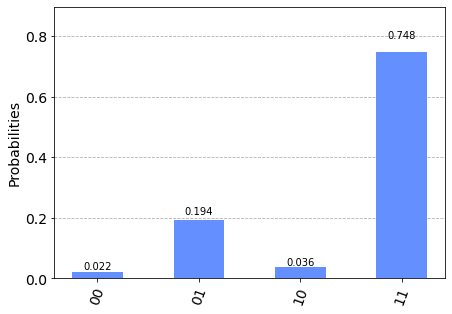

In [12]:
from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

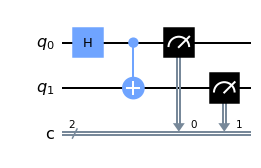

In [13]:
# Testing hadarmard gate
circuit = q.QuantumCircuit(2, 2) # 2 qubits, 2 classical bits

# Basic Circuit
circuit.h(0) #not gate
circuit.cx(0, 1) #controlled not (Flips 2nd qubit iff first qubit is 1)

circuit.measure([0, 1], [0, 1]) #Map qubit values to classical bits
circuit.draw(output='mpl')

In [16]:
# Local simulation
from qiskit import Aer

sim_backend = Aer.get_backend('qasm_simulator')
for backend in Aer.backends():
    print(backend)

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


Job Status: job has successfully run
{'00': 246, '11': 254}


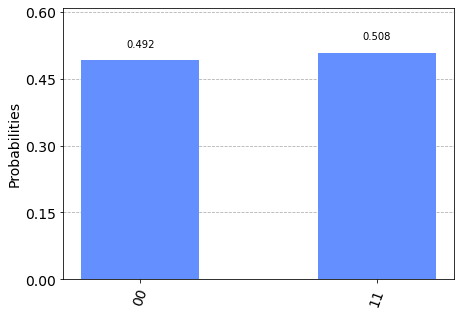

In [18]:
job = q.execute(circuit, backend=sim_backend, shots=500)
job_monitor(job)

result = job.result()
counts = result.get_counts(circuit)

print(counts)
plot_histogram([counts])